In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [6]:
df.Survived = df.Survived.replace(1,"Yes")
df.Survived = df.Survived.replace(0,"No")

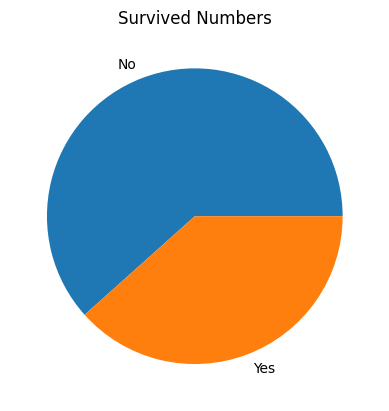

In [7]:
plt.title("Survived Numbers")
plt.pie(df.Survived.value_counts(),labels=df.Survived.unique());

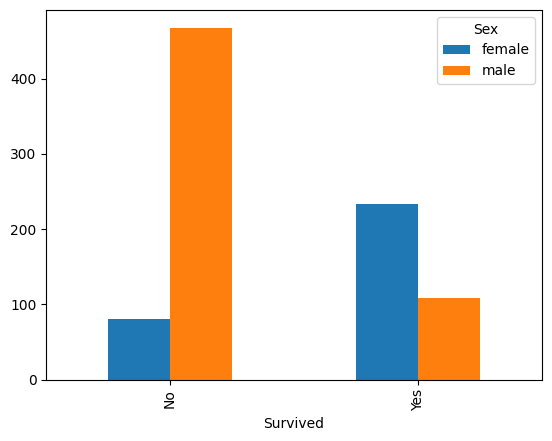

In [8]:
pd.crosstab(df.Survived,df.Sex).plot.bar();

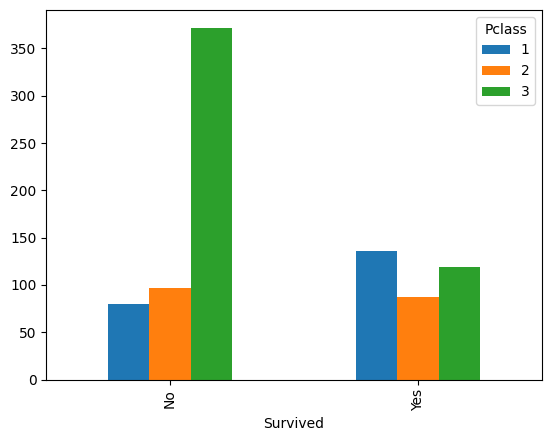

In [9]:
pd.crosstab(df.Survived,df.Pclass).plot.bar();

In [10]:
df['Single'] = (df['SibSp'] + df['Parch']) == 0 

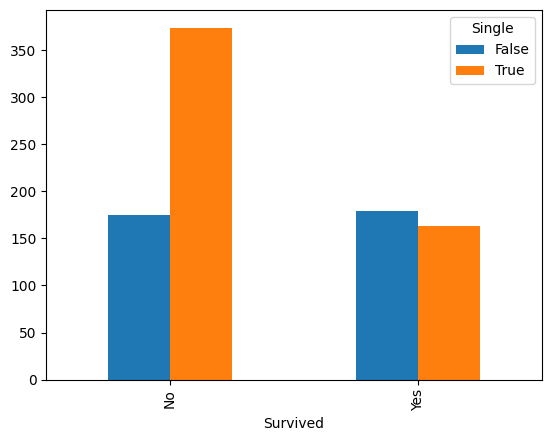

In [11]:
pd.crosstab(df.Survived,df.Single).plot.bar();

In [12]:
df['Child'] = df['Age']<18

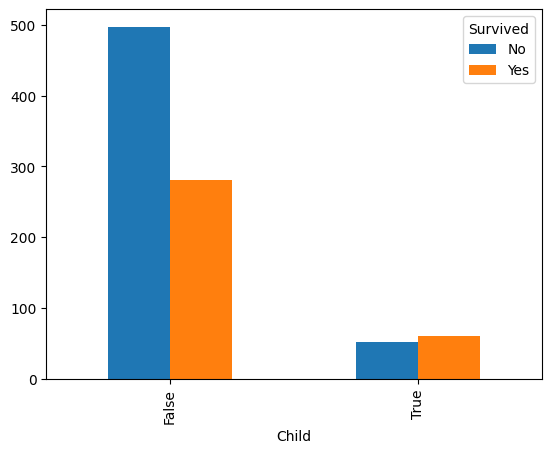

In [13]:
pd.crosstab(df.Child,df.Survived).plot.bar();

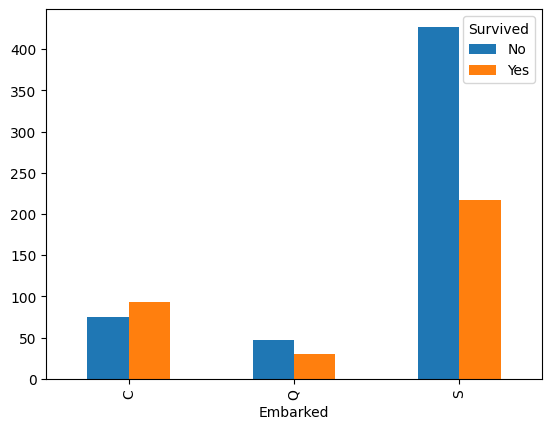

In [14]:
pd.crosstab(df.Embarked,df.Survived).plot.bar();

In [39]:
young_females = df[(df['Sex'] == 'female') & (df['Age']<18) & (df['Survived'] == "Yes")]
young_females.shape[0]/df[(df['Sex'] == 'female')& (df['Survived'] == "Yes")].shape[0] * 100 

16.30901287553648

In [40]:
young_males = df[(df['Sex'] == 'male') & (df['Age']<18) & (df['Survived'] == "Yes")]
young_males.shape[0]/df[(df['Sex'] == 'male')& (df['Survived'] == "Yes")].shape[0] * 100

21.100917431192663